In [48]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt

In [49]:
# Read the CSV files
Train_2018_Truck_With_Predictions = pd.read_csv("C:\\Users\\mahya\\OneDrive - University of Nebraska-Lincoln\\University of nebraska-lincoln\\Papers\\Predicting_Crash_Injury severity_Truck_Involved\\Data\\Total\\Train_2018_Truck_With_Predictions.csv")
#Train_2018_Truck_With_Predictions.drop(columns=["WorkZone_Type"], inplace=True, errors='ignore')

Valid_2019_Truck_With_Predictions = pd.read_csv("C:\\Users\\mahya\\OneDrive - University of Nebraska-Lincoln\\University of nebraska-lincoln\\Papers\\Predicting_Crash_Injury severity_Truck_Involved\\Data\\Total\\Valid_2019_Truck_With_Predictions.csv")
#Valid_2019_Truck_With_Predictions.drop(columns=["WorkZone_Type"], inplace=True, errors='ignore')

Feature ranking:
1. Feature Predictions: 0.29172186429564423
2. Feature Posted_Speed_Limit: 0.13869379029768508
3. Feature WorkZone_Type: 0.10421812784191861
4. Feature TimeDay: 0.10181168934995476
5. Feature Road_Character: 0.06556414209188142
6. Feature Workers_Present: 0.058163950125438325
7. Feature DayLight_crash: 0.05035243089337046
8. Feature Weekend_Nonweekend: 0.0435300942168705
9. Feature Intersate_NonInterstate: 0.031142150533910336
10. Feature Road_Surface_Condition: 0.03019762836653734
11. Feature Road_Trafficway: 0.029819966985053122
12. Feature Weather: 0.02923421386683809
13. Feature Harmful_Event_Location: 0.025549951134897733


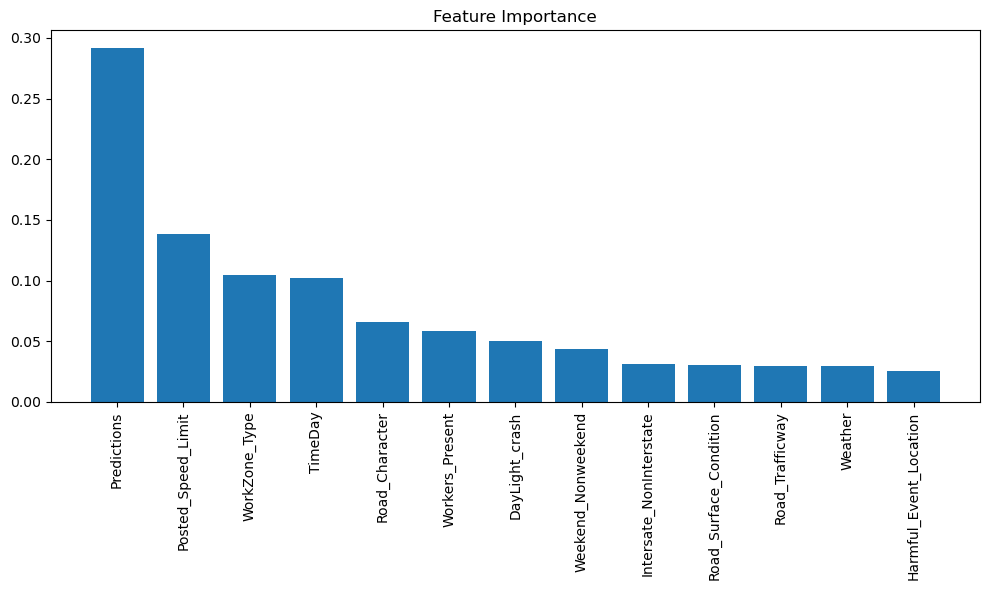

Predicted    0   1
Actual            
0          527  18
1          113   4


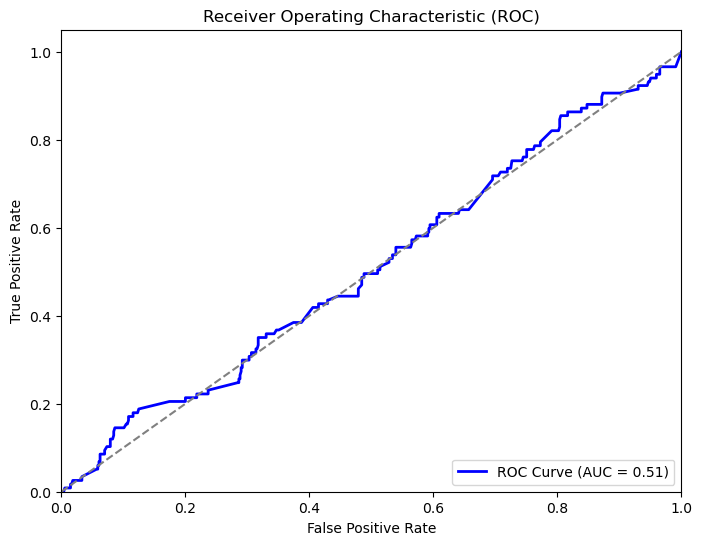

In [50]:
# List of factor columns
factor_columns = ["Workers_Present", "Weekend_Nonweekend", "TimeDay", "DayLight_crash",
                  "Intersate_NonInterstate", "Weather", "Road_Character",
                  "Road_Surface_Condition", "Harmful_Event_Location",
                  "Road_Trafficway", "WorkZone_Type"]

# Convert factor columns to categorical
for col in factor_columns:
    Train_2018_Truck_With_Predictions[col] = pd.Categorical(Train_2018_Truck_With_Predictions[col])
    Valid_2019_Truck_With_Predictions[col] = pd.Categorical(Valid_2019_Truck_With_Predictions[col])

# Ensure Injury_Severity is categorical
Train_2018_Truck_With_Predictions["Injury_Severity"] = pd.Categorical(Train_2018_Truck_With_Predictions["Injury_Severity"])
Valid_2019_Truck_With_Predictions["Injury_Severity"] = pd.Categorical(Valid_2019_Truck_With_Predictions["Injury_Severity"])

# Drop the ANO column
Train_2018_Truck_With_Predictions.drop(columns=["ANO"], inplace=True, errors='ignore')
Valid_2019_Truck_With_Predictions.drop(columns=["ANO"], inplace=True, errors='ignore')

# Prepare data for training
X_train = Train_2018_Truck_With_Predictions.drop(columns=["Injury_Severity"])
y_train = Train_2018_Truck_With_Predictions["Injury_Severity"]

# Train the Random Forest model
rf_model_with_prediction = RandomForestClassifier(n_estimators=500, max_features=3, random_state=42)
rf_model_with_prediction.fit(X_train, y_train)

# Print the model summary (feature importance)
importances = rf_model_with_prediction.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. Feature {X_train.columns[indices[f]]}: {importances[indices[f]]}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

# Prepare data for validation
X_valid = Valid_2019_Truck_With_Predictions.drop(columns=["Injury_Severity"])
y_valid = Valid_2019_Truck_With_Predictions["Injury_Severity"]

# Make predictions on validation set
valid_predictions_with_variable = rf_model_with_prediction.predict(X_valid)

# Summarize classification results
print(pd.crosstab(y_valid, valid_predictions_with_variable, rownames=['Actual'], colnames=['Predicted']))

# Get probabilities for positive class (assuming class "2" is positive)
valid_probabilities = rf_model_with_prediction.predict_proba(X_valid)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_valid, valid_probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
